In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize

In [2]:
# N=20取log bin的函数

def databin_20(lst):
    result = [[]]    
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n ==20:
            n = 0
            result.append([])
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append((np.median(result[j]))) 
    return output

def databin_20_std(lst):
    result = [[]]
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n == 20:
            n = 0
            result.append([]) 
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

In [3]:
# 参考 08 Arevalo 取log bin的函数

def databin_are(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j]))
    return output        
            

def databin_are_std(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

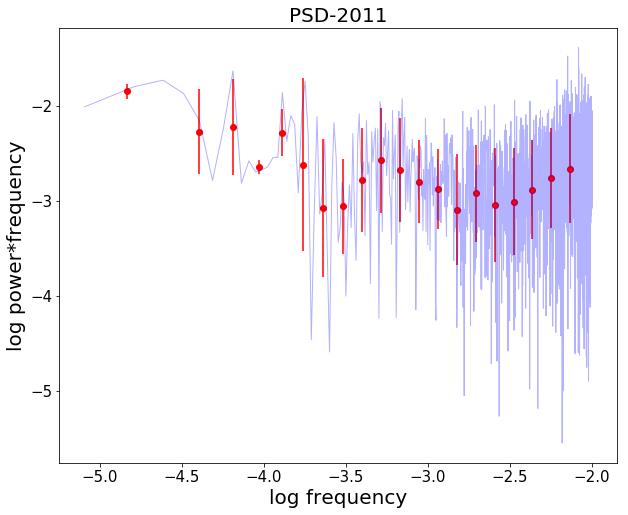

In [4]:
data11 = pd.read_csv("PG_11_rate_0310_tb50.csv")
data11['RATE'] = data11['RATE'].interpolate()


dt=50
counts_data = data11['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_11 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_11 = databin_are(F1,F1)
per_data_binned_11 = databin_are(per_data,F1)
per_data_b_std_11 = databin_are_std(per_data,F1)
p_times_f_data_b_11 = np.array(F1_binned_11)+np.array(per_data_binned_11)


plt.figure(figsize=(10,8))
plt.plot(F1_log_11, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_11, p_times_f_data_b_11, color="r", linewidth=1) 
plt.errorbar(F1_binned_11, p_times_f_data_b_11, yerr=per_data_b_std_11, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2011",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_11 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_11,columns = ['f','per'])
test.to_csv('perlist11.csv')

#perb=[10**i for i in per_data_binned_11]
#fb=[10**i for i in F1_binned_11]
#stdb=[10**i for i in per_data_b_std_11]
#perlistbinned_11 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_11,columns = ['f','per','std'])
#test.to_csv('perlistbinned11.csv')

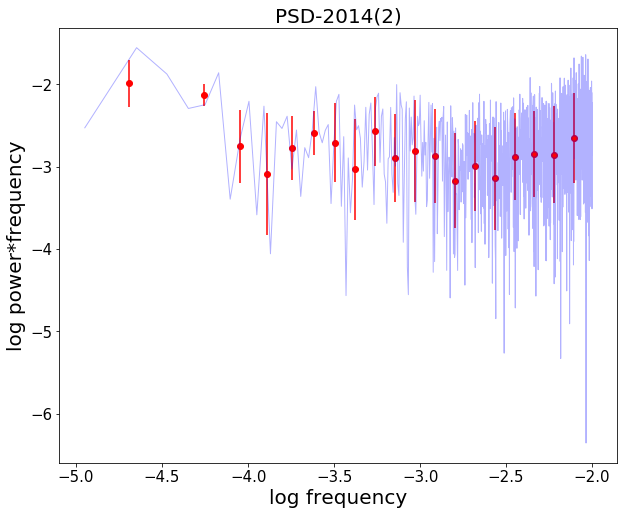

In [5]:
data142 = pd.read_csv("PG_142_rate_0310_tb50_sel.csv")
data142['RATE'] = data142['RATE'].interpolate()


dt=50
counts_data = data142['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_142 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_142 = databin_are(F1,F1)
per_data_binned_142 = databin_are(per_data,F1)
per_data_b_std_142 = databin_are_std(per_data,F1)
p_times_f_data_b_142 = np.array(F1_binned_142)+np.array(per_data_binned_142)


plt.figure(figsize=(10,8))
plt.plot(F1_log_142, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_142, p_times_f_data_b_142, color="r", linewidth=1) 
plt.errorbar(F1_binned_142, p_times_f_data_b_142, yerr=per_data_b_std_142, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2014(2)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_142 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_142,columns = ['f','per'])
test.to_csv('perlist142.csv')

#perb=[10**i for i in per_data_binned_142]
#fb=[10**i for i in F1_binned_142]
#stdb=[10**i for i in per_data_b_std_142]
#perlistbinned_142 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_142,columns = ['f','per','std'])
#test.to_csv('perlistbinned142.csv')

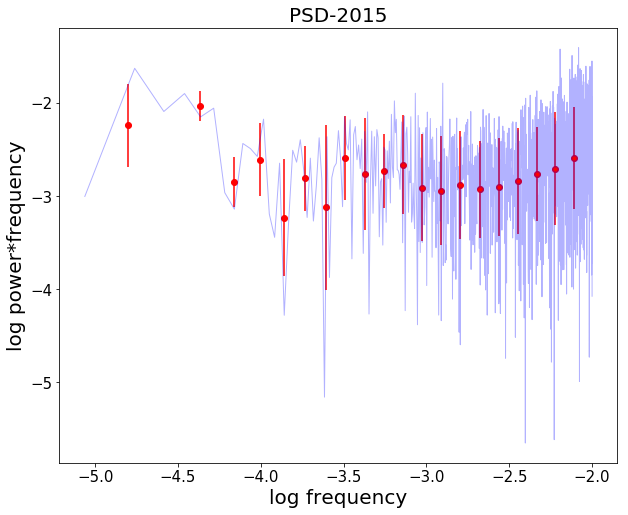

In [6]:
data15 = pd.read_csv("PG_15_rate_0310_tb50_sel.csv")
data15['RATE'] = data15['RATE'].interpolate()


dt=50
counts_data = data15['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_15 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_15 = databin_are(F1,F1)
per_data_binned_15 = databin_are(per_data,F1)
per_data_b_std_15 = databin_are_std(per_data,F1)
p_times_f_data_b_15 = np.array(F1_binned_15)+np.array(per_data_binned_15)


plt.figure(figsize=(10,8))
plt.plot(F1_log_15, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_15, p_times_f_data_b_15, color="r", linewidth=1) 
plt.errorbar(F1_binned_15, p_times_f_data_b_15, yerr=per_data_b_std_15, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2015",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_15 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_15,columns = ['f','per'])
test.to_csv('perlist15.csv')

#perb=[10**i for i in per_data_binned_15]
#fb=[10**i for i in F1_binned_15]
#stdb=[10**i for i in per_data_b_std_15]
#perlistbinned_15 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_15,columns = ['f','per','std'])
#test.to_csv('perlistbinned15.csv')

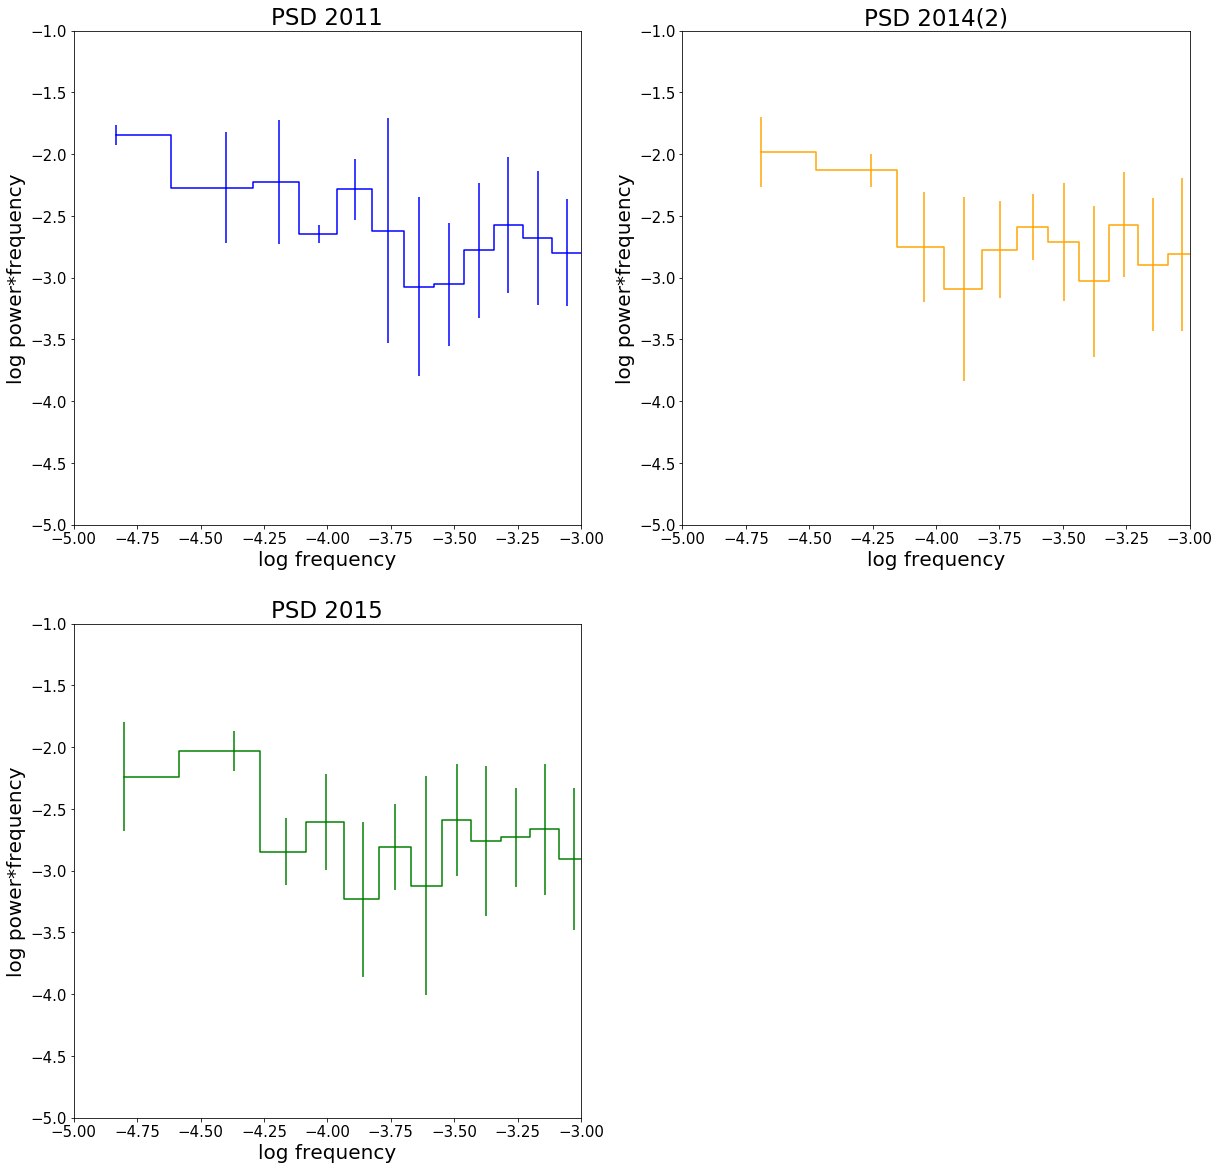

In [7]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)

ax1.step(F1_binned_11, p_times_f_data_b_11, where='mid',color="b")
ax2.step(F1_binned_142, p_times_f_data_b_142, where='mid',color="orange")
ax3.step(F1_binned_15, p_times_f_data_b_15, where='mid', color="g")

ax1.errorbar(F1_binned_11, p_times_f_data_b_11, yerr=per_data_b_std_11, fmt=',',color="b", label='2011')
ax2.errorbar(F1_binned_142, p_times_f_data_b_142, yerr=per_data_b_std_142, fmt=',',color="orange", label='2014(2)')
ax3.errorbar(F1_binned_15, p_times_f_data_b_15, yerr=per_data_b_std_15, fmt=',',color="g",label='2015')


ax1.set_xlabel("log frequency",fontsize=20)
ax1.set_ylabel("log power*frequency",fontsize=20)
ax1.set_xlim(-5.0,-3.0)
ax1.set_ylim(-5,-1)
ax1.tick_params(labelsize=15)
ax1.set_title("PSD 2011",fontsize=23)
ax2.set_xlabel("log frequency",fontsize=20)
ax2.set_ylabel("log power*frequency",fontsize=20)
ax2.set_xlim(-5.0,-3.0)
ax2.set_ylim(-5,-1)
ax2.tick_params(labelsize=15)
ax2.set_title("PSD 2014(2)",fontsize=23)
ax3.set_xlabel("log frequency",fontsize=20)
ax3.set_ylabel("log power*frequency",fontsize=20)
ax3.set_xlim(-5.0,-3.0)
ax3.set_ylim(-5,-1)
ax3.tick_params(labelsize=15)
ax3.set_title("PSD 2015",fontsize=23)
plt.show()